# FERM534 Project II - Emir Eğilli

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import *

import warnings
warnings.filterwarnings("ignore")

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
AMZN = yf.download("AMZN", start='2018-01-05', end='2024-01-05')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
rAMZN=(np.log(AMZN).diff().dropna())*100

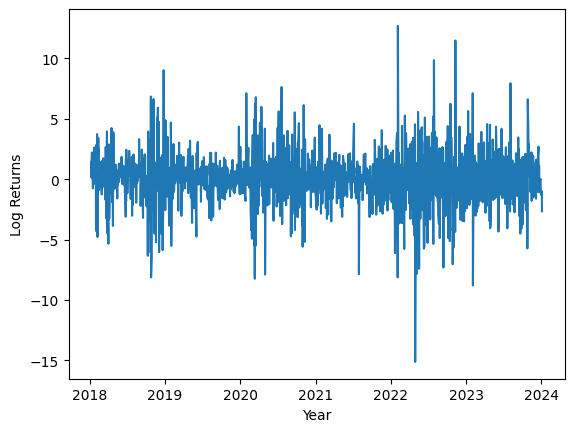

In [4]:
plt.plot(rAMZN)
plt.xlabel('Year')
plt.ylabel('Log Returns')
plt.show()

In [5]:
t_statistic, p_value = stats.ttest_1samp(rAMZN, 0)   # t-test for the mean. test value=0
print(t_statistic , p_value)

0.9882725926237924 0.3231778088806889


#### Applying t-test for mean H0 shows statistical insignificance (0.32 > 0.05)

## Q1-) Show that there are ARCH effects in the data (AMAZON log-returns). Comment

In [6]:
acorr_ljungbox(rAMZN, lags=[10]) # Checked up to 10 lags

,lb_stat,lb_pvalue
10,17.510035,0.063813


#### With p-value 0.063813 (> 0.05) there's no significant autocorrelation in return series. However, for GARCH modeling, which focuses on volatility patterns rather than return levels, further analysis is needed. Specifically, examining autocorrelation in squared or absolute returns would be more indicative of the volatility clustering GARCH models aim to capture. Our current findings suggest a lack of autocorrelation in returns, but this does not directly translate to volatility patterns, which are central to GARCH modeling.

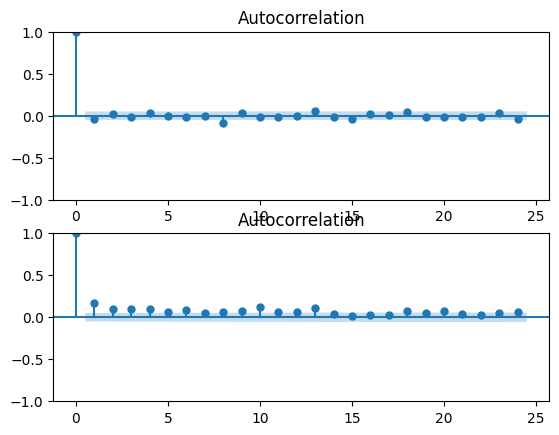

In [7]:
# Check for ACF on both returns and squared returns
fig, axes = plt.subplots(2, 1)
plot_acf(rAMZN, lags=24, ax=axes[0])
plot_acf(rAMZN**2, lags=24, ax=axes[1])
plt.show()

#### We have no significant autocorrelation in lags 1-24 in both the returns and squared returns.

In [8]:
r_demeaned = rAMZN - np.mean(rAMZN)
acorr_ljungbox(r_demeaned, lags=[10])

,lb_stat,lb_pvalue
10,17.510035,0.063813


In [9]:
acorr_ljungbox(r_demeaned**2, lags=[10])

,lb_stat,lb_pvalue
10,148.898544,6.280103e-27


#### The Ljung-Box test on Amazon's demeaned returns shows a p-value above 0.05, suggesting no significant autocorrelation in returns at the 5% level. However, the squared demeaned returns have a very low p-value, indicating strong autocorrelation in volatility. This supports using a GARCH model to capture the volatility clustering evident in Amazon's stock returns.

## Q2-) Estimate an ARCH model for the data assuming normal distribution for the standardized residuals. As a comment, write down the fitted model.

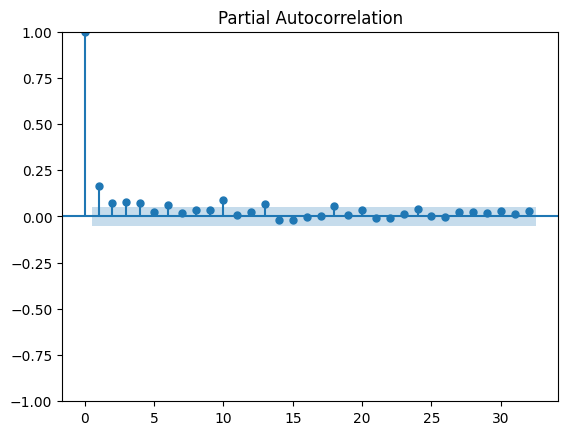

In [10]:
plot_pacf(r_demeaned**2)
plt.show()

#### PACF shows significant spike in first lag, indicating there's autocorrelation between the squared returns after removing the effects of intervening lags. This further supports the use of GARCH-type models that can model the autocorrelation in volatility.

In [11]:
AM1 = arch_model(rAMZN, p=1, q=0, rescale=False)  # ARCH(1) model estimation
res1 = AM1.fit(update_freq=0, disp='off')
print(res1.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3285.87
Distribution:                  Normal   AIC:                           6577.73
Method:            Maximum Likelihood   BIC:                           6593.69
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        11:47:20   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0846  5.329e-02      1.587      0.112 [-1.98

In [13]:
AM2 = arch_model(rAMZN, p=2, q=0, rescale=False)  # ARCH(2) model estimation
res2 = AM2.fit(update_freq=0, disp='off')
print(res2.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3257.97
Distribution:                  Normal   AIC:                           6523.93
Method:            Maximum Likelihood   BIC:                           6545.21
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        11:47:30   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0834  5.243e-02      1.590      0.112 [-1.93

In [14]:
AM3 = arch_model(rAMZN, p=3, q=0, rescale=False)  # ARCH(3) model estimation
res3 = AM3.fit(update_freq=0, disp='off')
print(res3.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3241.43
Distribution:                  Normal   AIC:                           6492.86
Method:            Maximum Likelihood   BIC:                           6519.45
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        11:47:33   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1139  5.179e-02      2.199  2.790e-02 [1.237e-0

In [15]:
AM4 = arch_model(rAMZN, p=4, q=0, rescale=False)  # ARCH(4) model estimation
res4 = AM4.fit(update_freq=0, disp='off')
print(res4.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3222.84
Distribution:                  Normal   AIC:                           6457.68
Method:            Maximum Likelihood   BIC:                           6489.59
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        11:47:36   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1317  4.930e-02      2.671  7.570e-03 [3.504e-0

#### We have tested for ARCH model through 1-4. AIC and BIC of ARCH(4) being less than ARCH(1), we selected ARCH(4).

#### Fitted model:
### $$ y = 0.1317 + \epsilon_t $$
### $$ \sigma_t^2 = 1.7841 + 0.2354 * \epsilon_{(t-1)}^2 + 0.1481 * \epsilon_{(t-2)}^2 + 0.2091 * \epsilon_{(t-3)}^2 + 0.1241 * \epsilon_{(t-4)}^2 $$

## Q3-) Check the model. Answer the following questions.
 - Is the normality assumption for the standardized residuals appropriate?
 - Is the mean equation adequate?
 - Is the variance equation adequate?

<AxesSubplot: xlabel='Date'>

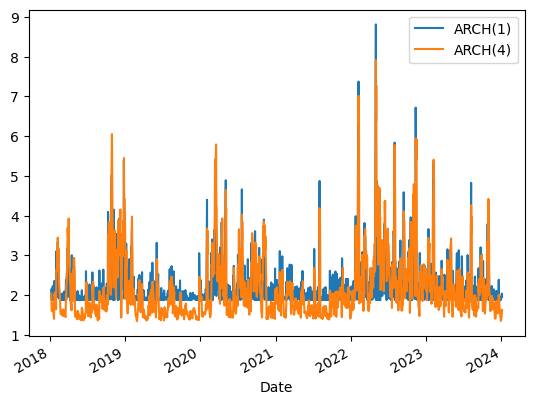

In [16]:
df = pd.concat([res1.conditional_volatility, res4.conditional_volatility], axis=1) # estimated conditional volatilities
df.columns = ["ARCH(1)", "ARCH(4)"]
df.plot()

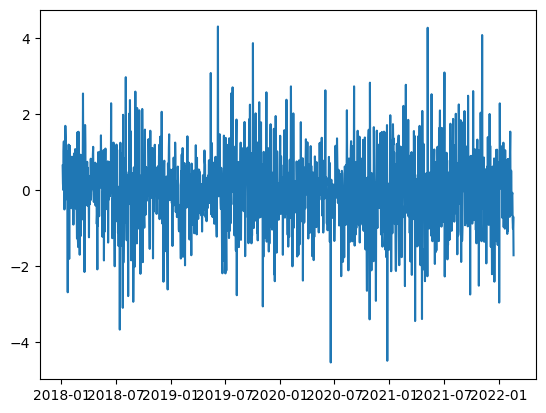

In [19]:
std_resi = res4.resid/res4.conditional_volatility
tdx = pd.date_range(start='2018-01-05', periods=len(rAMZN), freq='D')
plt.plot(tdx, std_resi)
plt.show()  

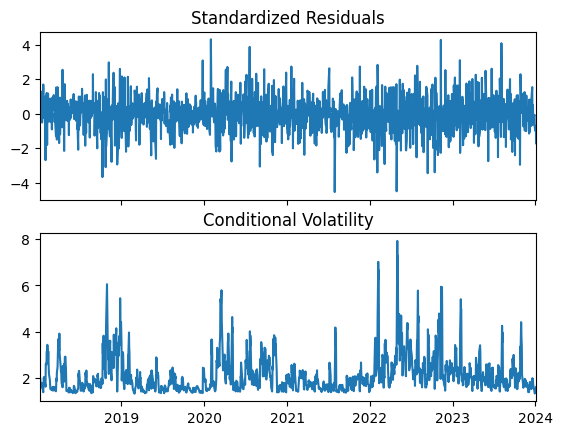

In [20]:
res4.plot()
plt.show()

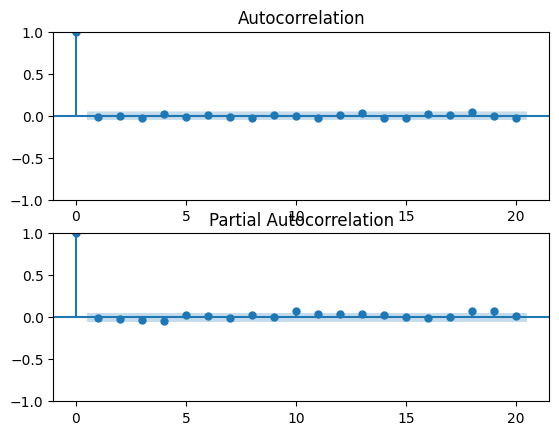

In [21]:
# ACF and PACF for squared standardized residuals
fig, axes = plt.subplots(2, 1)
plot_acf(std_resi, lags=20, ax=axes[0])
plot_pacf(std_resi**2, lags=20, ax=axes[1])
plt.show()

In [22]:
from scipy.stats import shapiro

In [23]:
shapiro(res1.std_resid) # Shapiro-Wilk test for normality of the standardized residuals

ShapiroResult(statistic=0.9757030010223389, pvalue=2.8079144319062424e-15)

In [24]:
acorr_ljungbox(std_resi, lags=[10])

,lb_stat,lb_pvalue
10,4.194965,0.938123


In [25]:
acorr_ljungbox(std_resi**2, lags=[10])

,lb_stat,lb_pvalue
10,16.618262,0.083249


In [27]:
acorr_ljungbox(res4.std_resid**2, lags=['10', '15', '18', '19', '20'])

,lb_stat,lb_pvalue
10,16.618262,0.083249
15,22.352651,0.098885
18,32.430070,0.019544
19,40.361084,0.002933
20,41.020816,0.003702


In [28]:
res4.arch_lm_test(lags=10, standardized=True)

ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 16.8290
P-value: 0.0782
Distributed: chi2(10)
WaldTestStatistic, id: 0x212307e76a0

#### A) Found pvalue=2.8079144319062424e-15 (<0.05) on Shapiro test. We reject the null hypothesis and accept HAlternative that the standardized residuals are not normally distributed. We should change the distribution to student-t or skewed student-t.

#### B) Ljung-box test shows 0.938123 (>0.05) meaning standardized residuals are statistically insignificant. Therefore we don't have autocorrelation.

#### C) Applying Ljung-box to square of standardized residuals shows 0.083249 (>0.05) statistical insignificance again.

## Q4-) Estimate alternative ARCH models assuming student-t and skewed student-t distributions for the standardized residuals. Interpret shape and skew coefficient estimates. Which model would you prefer? Justify your choice based on coefficient estimates and on information criteria.

In [29]:
import statsmodels.api as sm

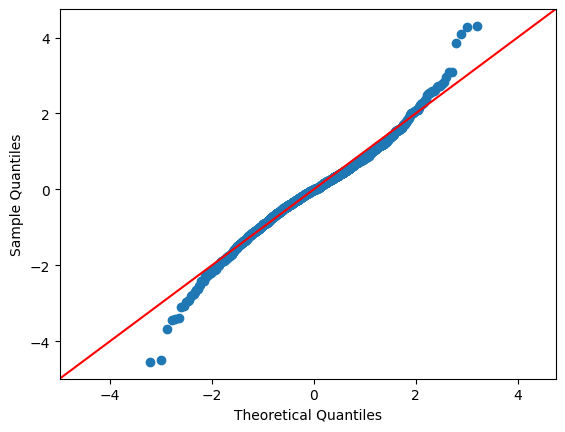

In [31]:
# q-q plot
fig = sm.qqplot(res4.std_resid, line='45')
plt.show() 

In [32]:
AM4s = arch_model(rAMZN, p=4, q=0, dist="StudentsT", rescale=False)    # ARCH(4) with student-t distributed residuals
res4s = AM4s.fit(update_freq=10, disp='off')
print(res4s.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -3182.95
Distribution:      Standardized Student's t   AIC:                           6379.91
Method:                  Maximum Likelihood   BIC:                           6417.14
                                              No. Observations:                 1508
Date:                      Mon, Jan 22 2024   Df Residuals:                     1507
Time:                              13:28:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [33]:
AM4ss = arch_model(rAMZN, p=4, q=0, dist='skewstudent', rescale=False)    #ARCH(4) with skewed student-t distributed residuals
res4ss = AM4ss.fit(update_freq=10, disp='off')
print(res4ss.summary())

                            Constant Mean - ARCH Model Results                           
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  ARCH   Log-Likelihood:               -3182.41
Distribution:      Standardized Skew Student's t   AIC:                           6380.83
Method:                       Maximum Likelihood   BIC:                           6423.38
                                                   No. Observations:                 1508
Date:                           Mon, Jan 22 2024   Df Residuals:                     1507
Time:                                   13:28:59   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

#### In our ARCH(4) model, the shape parameter "nu" = 5.3828 and "eta" = 5.3852 both indicate leptokurtosis (kurtosis > 3.0). Skewness parameter "lambda" is slightly negative, suggesting skewness to the left that's not statistically significant. 
#### Since the ARCH terms are significant in both Student-t and skewed Student-t models, and considering the lower AIC and BIC values, we chose the "ARCH(4) with Student-t distributed residuals" model for its parsimony and better fit, as it accounts for heavy tails without unnecessary skewness parameters.

## Q5-) Estimate a GARCH (1,1) model for the data. Specify an appropriate distribution for the standardized residuals. Write down the fitted model as a comment. Compare this model with the ARCH model that you have chosen in question 4. Which model would you prefer? Comment.

In [34]:
# Standard GARCH(1,1) model
SGM = arch_model(rAMZN)
resSGM = SGM.fit(update_freq=10, disp='off')
print(resSGM.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3203.58
Distribution:                  Normal   AIC:                           6415.15
Method:            Maximum Likelihood   BIC:                           6436.43
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        13:39:21   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1279  4.624e-02      2.766  5.677e-03 [3.727e-0

In [35]:
#GARCH(1,1) with student-t distributed residuals
GM = arch_model(rAMZN, p=1, q=1, dist='studentst')
resGM = GM.fit(update_freq=10, disp='off')
print(resGM.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3160.98
Distribution:      Standardized Student's t   AIC:                           6331.97
Method:                  Maximum Likelihood   BIC:                           6358.56
                                              No. Observations:                 1508
Date:                      Mon, Jan 22 2024   Df Residuals:                     1507
Time:                              13:39:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [38]:
#GARCH(1,1) with skewed student-t distributed residuals
sGM = arch_model(rAMZN, p=1, q=1, dist='skewstudent')
ressGM = sGM.fit(update_freq=10, disp='off')
print(ressGM.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -3160.24
Distribution:      Standardized Skew Student's t   AIC:                           6332.47
Method:                       Maximum Likelihood   BIC:                           6364.38
                                                   No. Observations:                 1508
Date:                           Mon, Jan 22 2024   Df Residuals:                     1507
Time:                                   13:49:21   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

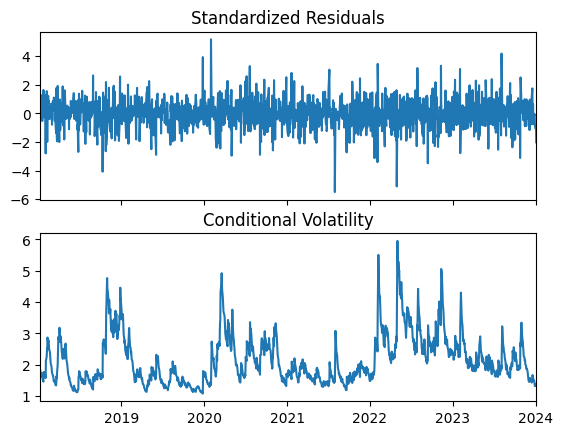

In [39]:
resGM.plot()
plt.show()

#### Among the estimated models, the "GARCH(1,1) with Student-t distributed residuals" demonstrates the lowest AIC and BIC scores, indicating a superior fit to the data while efficiently penalizing complexity. The significance of the alpha and beta parameters at the 5% level further justifies our selection. So the model's mean and variance equations will be as below:

### $$  y = 0.1207 + \epsilon_t $$
### $$  \sigma_t^2 = 0.1141 + 0.1183 * \epsilon_{(t-1)}^2 + 0.8665 * \sigma_{(t-1)}^2 $$

####  This GARCH(1,1) model is preferred over the "ARCH(4) with Student-t distributed residuals" due to its parsimonious representation of volatility dynamics as reflected in its statistical criteria.

## Q6-) Estimate a GJR-GARCH (1,1) model for the data. Assume normal distribution for the standardized residuals. Interpret the leverage parameter in detail.

In [40]:
#GJR-GARCH(1,1) model estimation
gjr = arch_model(rAMZN, mean='Constant', p=1, o=1, q=1, dist='normal')
gjr = gjr.fit(update_freq=0, disp='off')
print(gjr.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3198.16
Distribution:                  Normal   AIC:                           6406.32
Method:            Maximum Likelihood   BIC:                           6432.91
                                        No. Observations:                 1508
Date:                Mon, Jan 22 2024   Df Residuals:                     1507
Time:                        13:51:35   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0859  4.641e-02      1.850  6.429e-02 [-5.09

#### In our GJR-GARCH model, the positive coefficient of the leverage parameter, gamma (0.1130), with a p-value below 5%, signifies a statistically significant leverage effect. This result implies that the model effectively captures the asymmetric impact of shocks on volatility, where negative shocks lead to a greater increase in future volatility compared to positive shocks of the same magnitude. 

#### P-values of both omega, alpha, gamma and beta are statistically significant (<0.05). Fitted model's mean and variance equations:

### $$ r(t)=0.012+a(t) a(t)=s(t)z(t), z(t)~N(0,1) $$
#### s^2(t)=0.00067443+0.0882a^2(t-1)-0.028 * D * a^2(t-1)+0.8781(s^2(t-1))
where D=1 if a(t-1)<0.
#### where I is the indicator function for negative shocks and a(t) is the residual at time t.